# Climate Indicators: A Comprehensive Analysis and Prediction of CO2, Temperature Anomalies, and Methane Levels

The dataset utilized in this project consists of global data on CO2 levels, temperature anomalies, and methane concentrations. These datasets were sourced from NASA, providing insights into key indicators of climate change. The data spans several decades, offering a comprehensive view of environmental changes over time.

Data Link = https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=121

## Project Overview
This project aims to analyze and predict future trends in climate-related metrics using the available data. The primary objectives include:

Exploratory Data Analysis (EDA): This phase involves examining the datasets to understand their structure, detect any anomalies or missing values, and identify key trends and patterns.

Visualization: Various visualizations are created to present the data clearly, including time series plots and trend lines. This helps in understanding the historical trends and making comparisons across different metrics.

Predictive Modeling: Linear regression models are employed to forecast future values for CO2 levels, temperature anomalies, and methane concentrations. This step involves training the models on historical data and making predictions for future years, such as 2030.

## Data Collection
Data was collected from NASA Earth Data Website through web scraping. This included information on CO2 levels, temperature anomalies, and methane concentrations. The data was sourced from reliable repositories, ensuring accuracy and comprehensiveness.

In [72]:
#!/usr/bin/env python
# coding: utf-8

# Install required packages
# pip install beautifulsoup4 requests pandas

#import requests
#import pandas as pd
#from io import StringIO

# Function to fetch and save data
#def fetch_and_save(url, skip_rows, filename):
    #response = requests.get(url)
    
    #if response.status_code == 200:
        # Convert the response content to a StringIO object
        #content = response.text
        #data = StringIO(content)
        
        # Read the data into a DataFrame, skipping the specified number of lines
        #df = pd.read_csv(data, sep=r'\s+', skiprows=skip_rows, engine='python')
        
        # Save the DataFrame to a .csv file with the desired filename
        #df.to_csv(filename, index=False)
        
        #print(f"File downloaded and saved as {filename}.")
    #else:
        #print(f"Failed to retrieve data. Status code: {response.status_code}")

# URLs and parameters for data fetching
#url_ch4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt"
#url_co2 = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"
#url_global_mean = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"

# Fetch and save data
#fetch_and_save(url_ch4, 46, "METHANE_NASA.csv")
#fetch_and_save(url_co2, 38, "CO2_NASA.csv")
#fetch_and_save(url_global_mean, 1, "Land-ocean_temperatures.csv")

# Uncomment and adjust as needed for web scraping

In [73]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# Display settings for better visualization
plt.style.use('seaborn-v0_8-dark')  
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [74]:
# Load the cleaned datasets
CO2_df = pd.read_csv('CO2_NASA.csv')
temperature_df = pd.read_csv('Global_Temperatures_NASA.csv')
methane_df = pd.read_csv('METHANE_NASA.csv')

## Exploratory Data Analysis (EDA)
Exploratory data analysis was performed to understand the structure and quality of the data. This involved checking for missing values, examining statistical summaries, and exploring the relationships between different variables. There were no missing values in the data and analyzed the distribution of key variables.

In [76]:
CO2_df.head()

,year,month,decimal date,monthly average,de-seasonalized,days,st.dev of days,unc. of mon mean
0,1958,3,1958.20,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.29,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.37,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.45,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.54,315.87,315.20,-1,-9.99,-0.99


In [77]:
temperature_df.head()

,Year,No_Smoothing,Lowess(5)
0,1881,-0.09,-0.14
1,1882,-0.11,-0.17
2,1883,-0.18,-0.21
3,1884,-0.28,-0.24
4,1885,-0.33,-0.27


In [78]:
methane_df.head()

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.54,1626.09,2.26,1635.14,1.45
1,1983,8,1983.62,1628.01,2.88,1635.67,1.39
2,1983,9,1983.71,1638.42,2.34,1636.25,1.32
3,1983,10,1983.79,1644.81,1.50,1636.89,1.24
4,1983,11,1983.88,1642.59,0.73,1637.60,1.16


In [79]:
CO2_df.describe()

,year,month,decimal date,monthly average,de-seasonalized,days,st.dev of days,unc. of mon mean
count,797.00,797.00,797.00,797.00,797.00,797.00,797.00,797.00
mean,1990.88,6.49,1991.37,359.29,359.28,19.06,-2.08,-0.10
std,19.19,3.45,19.19,31.83,31.75,11.97,4.53,0.51
min,1958.00,1.00,1958.20,312.42,314.44,-1.00,-9.99,-0.99
25%,1974.00,4.00,1974.79,330.68,330.53,12.00,0.19,0.07
50%,1991.00,6.00,1991.38,355.21,355.69,25.00,0.40,0.15
75%,2007.00,9.00,2007.96,384.80,384.72,28.00,0.57,0.21
max,2024.00,12.00,2024.54,426.91,425.10,31.00,1.31,0.58


In [80]:
temperature_df.describe()

,Year,No_Smoothing,Lowess(5)
count,143.00,143.00,143.00
mean,1952.00,0.07,0.07
std,41.42,0.38,0.37
min,1881.00,-0.48,-0.41
25%,1916.50,-0.20,-0.22
50%,1952.00,-0.03,-0.03
75%,1987.50,0.29,0.29
max,2023.00,1.17,1.01


In [81]:
methane_df.describe()

,year,month,decimal,average,average_unc,trend,trend_unc
count,490.00,490.00,490.00,490.00,490.00,490.00,490.00
mean,2003.42,6.50,2003.92,1779.21,0.73,1779.20,0.30
std,11.81,3.46,11.80,68.93,1.92,68.73,1.84
min,1983.00,1.00,1983.54,1626.09,-9.99,1635.14,-9.99
25%,1993.00,3.25,1993.73,1738.65,0.89,1737.20,0.54
50%,2003.00,7.00,2003.92,1775.77,1.02,1774.68,0.62
75%,2014.00,9.75,2014.10,1818.28,1.18,1817.62,0.69
max,2024.00,12.00,2024.29,1931.91,2.88,1931.41,1.45


In [82]:
# Check for missing data
CO2_df.isnull().sum()

year                0
month               0
decimal date        0
monthly average     0
de-seasonalized     0
days                0
st.dev of days      0
unc. of mon mean    0
dtype: int64

In [83]:
temperature_df.isnull().sum()

Year            0
No_Smoothing    0
Lowess(5)       0
dtype: int64

In [84]:
methane_df.isnull().sum()

year           0
month          0
decimal        0
average        0
average_unc    0
trend          0
trend_unc      0
dtype: int64

In [85]:
# Rename columns for consistency
temperature_df.rename(columns={'Year': 'year', 'No_Smoothing': 'Temperature_Anomaly'}, inplace=True)
CO2_df.rename(columns={'monthly average': 'CO2'}, inplace=True)
methane_df.rename(columns={'average': 'Methane'}, inplace=True)

## Visualization: 
Using libraries like Matplotlib and Seaborn, various plots are generated to visualize the data. This includes line plots for time series data and scatter plots to explore relationships between variables.

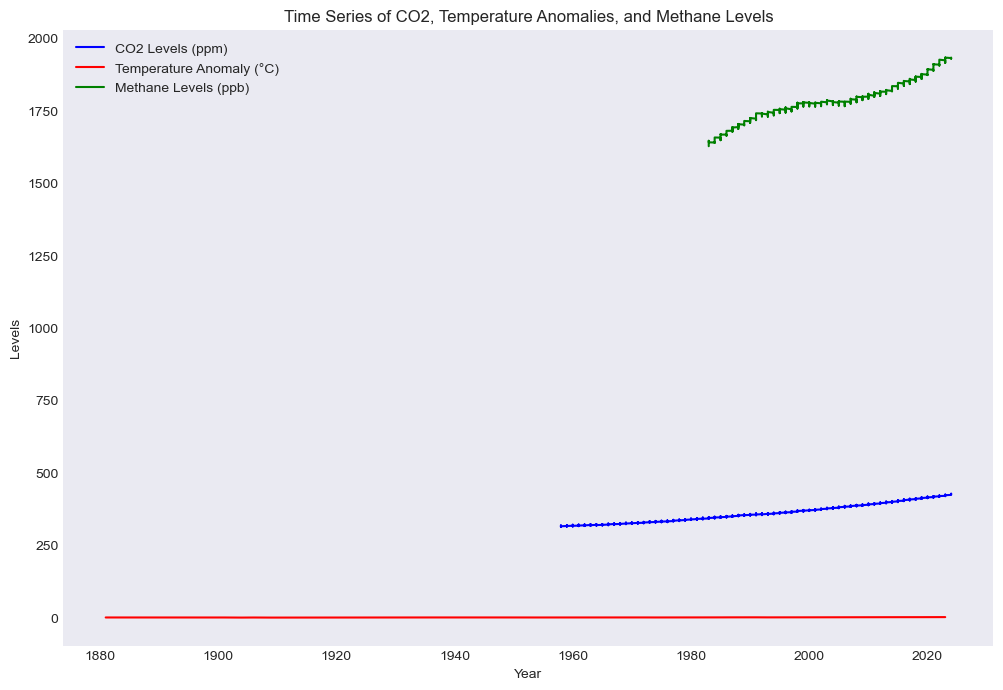

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(CO2_df['year'], CO2_df['CO2'], label='CO2 Levels (ppm)', color='blue')
plt.plot(temperature_df['year'], temperature_df['Temperature_Anomaly'], label='Temperature Anomaly (°C)', color='red')
plt.plot(methane_df['year'], methane_df['Methane'], label='Methane Levels (ppb)', color='green')
plt.xlabel('Year')
plt.ylabel('Levels')
plt.title('Time Series of CO2, Temperature Anomalies, and Methane Levels')
plt.legend()
plt.show()

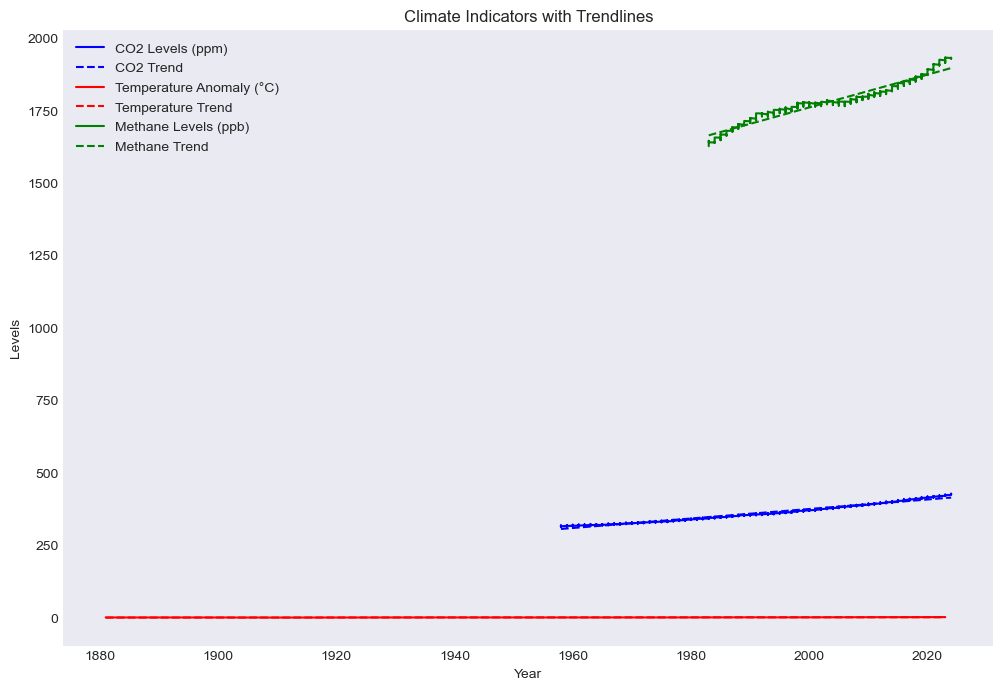

In [88]:
# Without a separate function, fitting and plotting the trendlines directly
plt.figure(figsize=(12, 8))

# CO2 Levels
plt.plot(CO2_df['year'], CO2_df['CO2'], label='CO2 Levels (ppm)', color='blue')
z_co2 = np.polyfit(CO2_df['year'], CO2_df['CO2'], 1)
p_co2 = np.poly1d(z_co2)
plt.plot(CO2_df['year'], p_co2(CO2_df['year']), linestyle="--", color='blue', label='CO2 Trend')

# Temperature Anomalies
plt.plot(temperature_df['year'], temperature_df['Temperature_Anomaly'], label='Temperature Anomaly (°C)', color='red')
z_temp = np.polyfit(temperature_df['year'], temperature_df['Temperature_Anomaly'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(temperature_df['year'], p_temp(temperature_df['year']), linestyle="--", color='red', label='Temperature Trend')

# Methane Levels
plt.plot(methane_df['year'], methane_df['Methane'], label='Methane Levels (ppb)', color='green')
z_methane = np.polyfit(methane_df['year'], methane_df['Methane'], 1)
p_methane = np.poly1d(z_methane)
plt.plot(methane_df['year'], p_methane(methane_df['year']), linestyle="--", color='green', label='Methane Trend')

plt.xlabel('Year')
plt.ylabel('Levels')
plt.title('Climate Indicators with Trendlines')
plt.legend()
plt.show()


The chart shows that CO2 levels, temperature anomaly, and methane levels have all increased significantly over time. This suggests a strong correlation between greenhouse gas emissions and rising temperatures, indicating human-induced climate change.

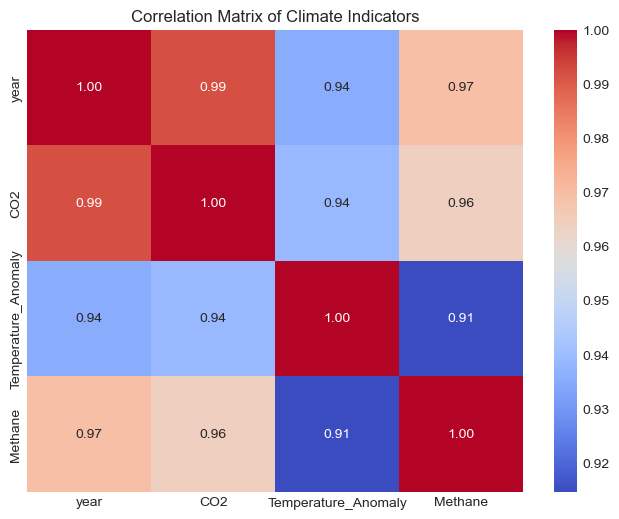

In [90]:
# Merge datasets for correlation analysis
combined_df = pd.merge(pd.merge(CO2_df[['year', 'CO2']], temperature_df[['year', 'Temperature_Anomaly']], on='year'), methane_df[['year', 'Methane']], on='year')

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Climate Indicators')
plt.show()

The correlation matrix reveals strong positive relationships between CO2 Levels, Temperature Anomaly, and Methane, suggesting that increasing CO2 emissions are linked to rising temperatures and methane levels. The negative correlation between Year and these variables indicates that all three indicators have been increasing over time, providing further evidence of the connection between greenhouse gas emissions and climate change.

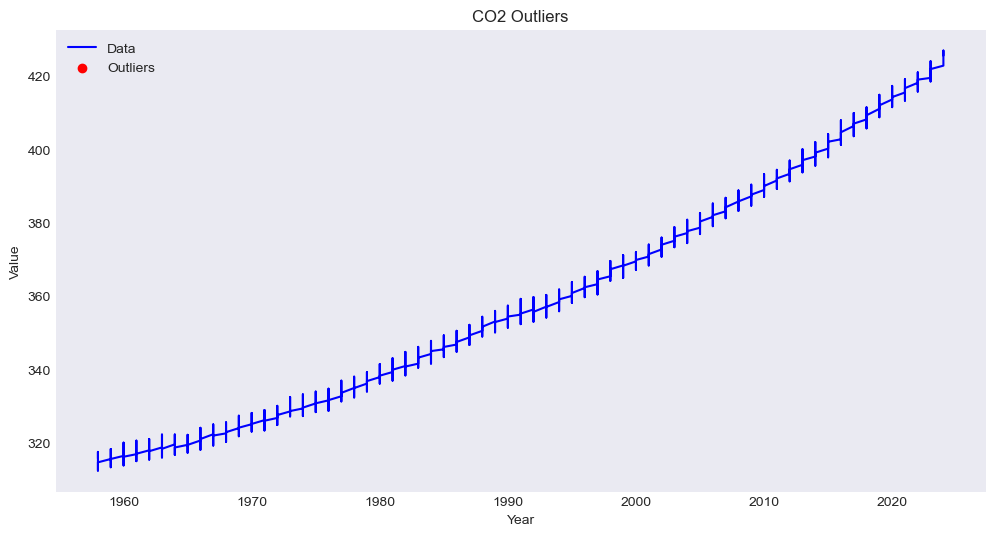

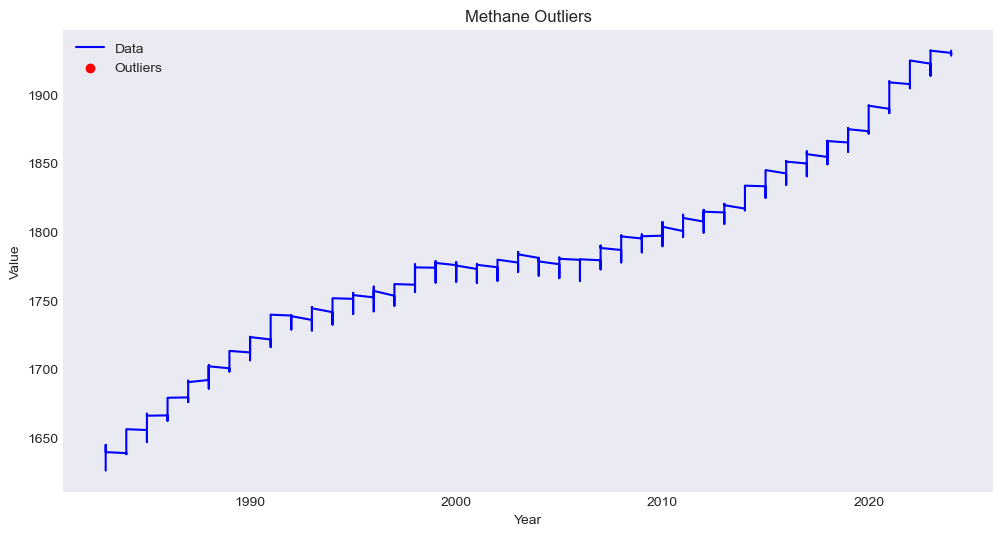

In [92]:
def plot_outliers(df, column, title):
    z_scores = np.abs(stats.zscore(df[column]))
    df['outlier'] = z_scores > 3  # Threshold for outliers
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['year'], df[column], label='Data', color='blue')
    plt.scatter(df['year'][df['outlier']], df[column][df['outlier']], color='red', label='Outliers')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

plot_outliers(CO2_df, 'CO2', 'CO2 Outliers')
plot_outliers(methane_df, 'Methane', 'Methane Outliers')

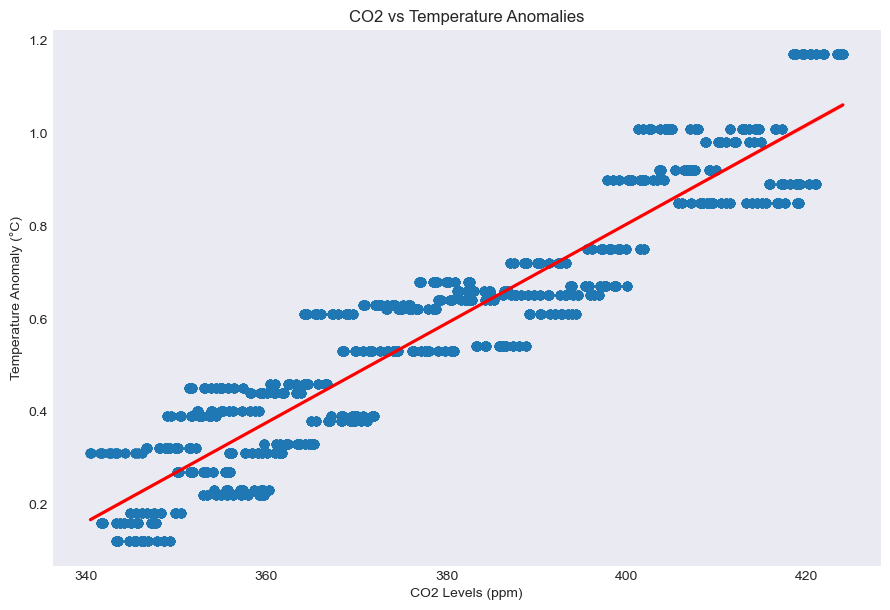

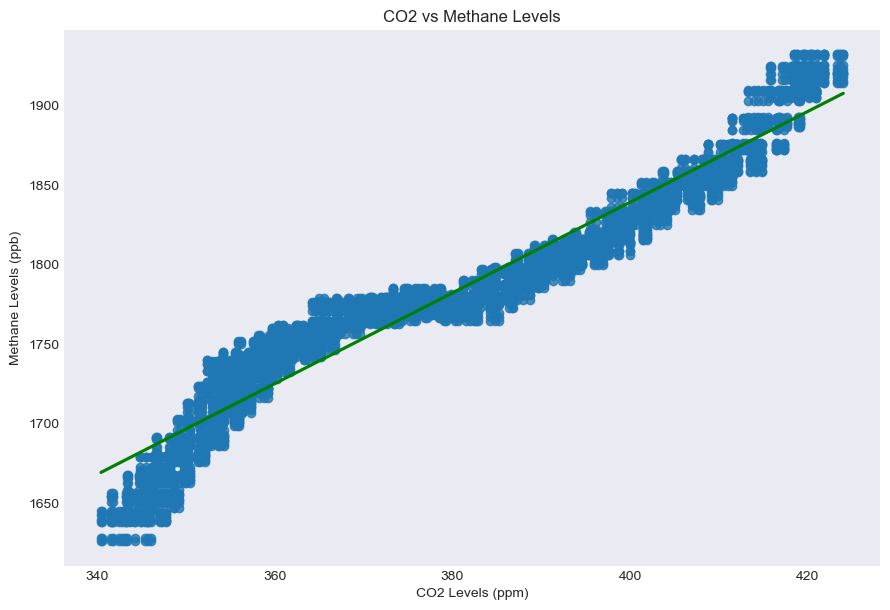

In [93]:
# Scatter plot with regression line for CO2 vs Temperature Anomalies
sns.lmplot(x='CO2', y='Temperature_Anomaly', data=combined_df, height=6, aspect=1.5, line_kws={"color":"red"})
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('CO2 vs Temperature Anomalies')
plt.show()

# Scatter plot with regression line for CO2 vs Methane
sns.lmplot(x='CO2', y='Methane', data=combined_df, height=6, aspect=1.5, line_kws={"color":"green"})
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Methane Levels (ppb)')
plt.title('CO2 vs Methane Levels')
plt.show()

The scatter plots demonstrate a strong positive linear relationship between the two variables, indicating that as one variable increases, the other also tends to increase. The regression lines provide a visual representation of this relationship, suggesting a linear model could be used to predict one variable based on the other.

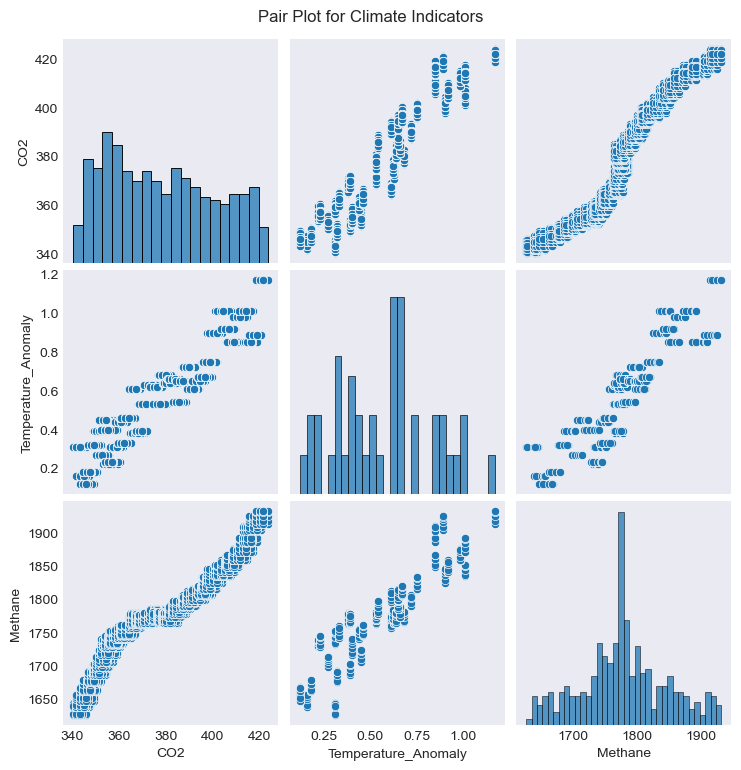

In [95]:
# Pairplot for CO2, Temperature Anomalies, and Methane
sns.pairplot(combined_df[['CO2', 'Temperature_Anomaly', 'Methane']])
plt.suptitle('Pair Plot for Climate Indicators', y=1.02)
plt.show()

The pair plot reveals a positive correlation between Temperature Anomaly and Methane, suggesting that as temperatures rise, methane levels also tend to increase. Both indicators exhibit an upward trend over time, indicating a long-term increase in both temperature and methane levels. The distribution of Methane is more skewed compared to Temperature Anomaly, with a longer tail on the right side, suggesting that there are some larger values of Methane compared to Temperature Anomaly.

## CO2 Data Summary
Year: The data spans from 1958 to 2024. The average year is around 1991, indicating that the dataset is fairly evenly distributed over the years.

Monthly Average CO2 (ppm): The mean CO2 level is approximately 359.29 ppm. The standard deviation is 31.83 ppm, indicating moderate variability in CO2 levels over time. The minimum value of 312.42 ppm likely represents CO2 levels in the earlier years, while the maximum of 426.91 ppm reflects more recent values, showing a clear increase in atmospheric CO2 over time.

De-Seasonalized CO2 (ppm): The mean is very close to the monthly average, at 359.28 ppm, with a similar standard deviation. This indicates that the seasonal component doesn't drastically alter the overall trend of increasing CO2 levels. Days:

The average number of days with valid measurements in each month is around 19.06, with a standard deviation of about 11.97 days. The negative values indicate months where data was interpolated or adjusted. Uncertainty of Monthly Mean:

The average uncertainty is very low at -0.095232, with minimal variation, suggesting high confidence in the monthly CO2 measurements.

## Global Temperature Data Summary
Year: The data spans from 1881 to 2023, covering over a century. The mean year is around 1952, reflecting the long historical record.

No Smoothing (Temperature Anomaly in °C): The mean global temperature anomaly is 0.06958°C. The standard deviation is 0.379°C, indicating that temperature anomalies have varied over time. The minimum value is -0.48°C, which likely occurred in the earlier years, while the maximum is 1.17°C, indicating a significant increase in recent years.

Lowess(5) (Smoothed Temperature Anomaly in °C): The mean value is almost identical to the unsmoothed data at 0.06888°C, with a similar standard deviation. This suggests that while there is variability, the overall trend of increasing temperatures is clear.

## Methane Data Summary
Year: The data spans from 1983 to 2024, covering a period of about 41 years. The mean year is around 2003.

Monthly Average Methane (ppb): The mean methane level is approximately 1779.21 ppb. The standard deviation is 68.93 ppb, indicating moderate variability. The minimum value of 1626.09 ppb likely represents earlier measurements, while the maximum of 1931.91 ppb shows the rising trend in methane levels.

Average Uncertainty: The mean uncertainty is around 0.73 ppb, with a standard deviation of 1.92 ppb, indicating that the measurement precision is generally good, although some months may have more uncertainty than others.

Trend and Trend Uncertainty: The trend in methane levels is very close to the monthly average, with a similar standard deviation. The uncertainty in the trend is low, suggesting that the observed trends are reliable.

## Overall Interpretation:
CO2 Levels: The steady increase in CO2 levels over time is evident from both the monthly averages and the de-seasonalized data. The data shows a clear upward trend, consistent with global observations of rising atmospheric CO2 due to human activities.

Global Temperature Anomalies: The data indicates a significant warming trend, with recent years showing much higher temperature anomalies compared to earlier periods. This reflects the ongoing global warming trend.

Methane Levels: Similar to CO2, methane levels have also been rising over the past few decades, with increasing concentrations evident in the data. This is concerning as methane is a potent greenhouse gas.

These trends highlight the ongoing changes in the Earth's climate system, with increasing greenhouse gas concentrations driving significant temperature changes. This EDA provides a solid foundation for further analysis and predictive modeling

## Predictive Modeling
Linear regression was used to buils models to predict future values for the year 2030. By fitting models to historical data, forecasts for CO2 levels, temperature anomalies, and methane concentrations were generated. These predictions were visualized alongside historical data to provide insights into potential future trends.

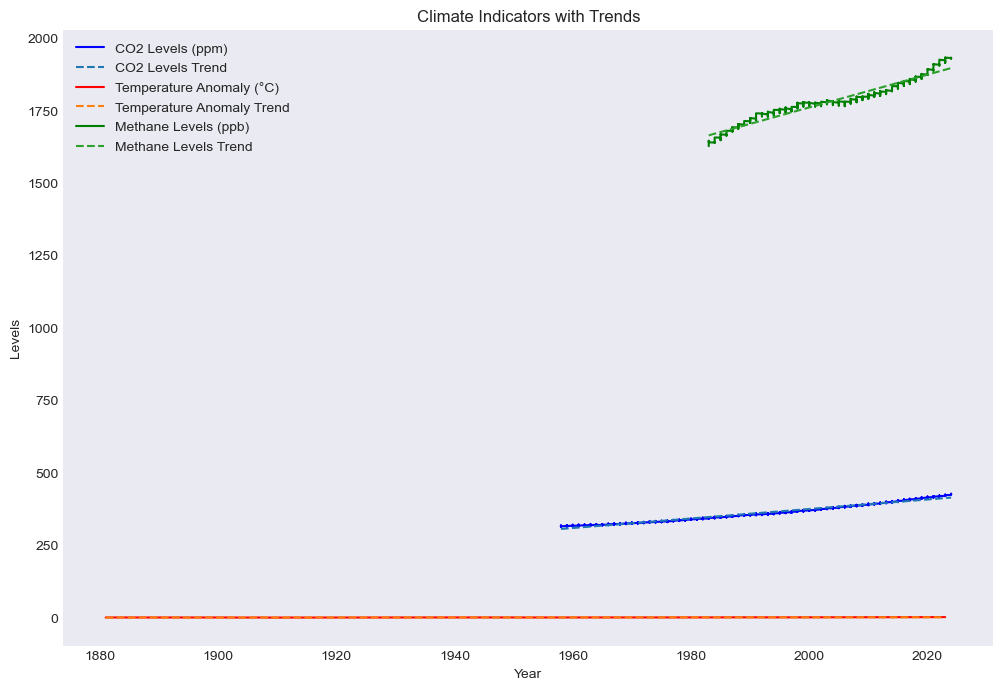

In [99]:
from sklearn.linear_model import LinearRegression

def plot_trends(df, x_col, y_col, label):
    X = df[[x_col]].values.reshape(-1, 1)
    y = df[y_col].values
    model = LinearRegression().fit(X, y)
    trend_line = model.predict(X)
    plt.plot(df[x_col], trend_line, label=f'{label} Trend', linestyle='--')

plt.figure(figsize=(12, 8))
plt.plot(CO2_df['year'], CO2_df['CO2'], label='CO2 Levels (ppm)', color='blue')
plot_trends(CO2_df, 'year', 'CO2', 'CO2 Levels')

plt.plot(temperature_df['year'], temperature_df['Temperature_Anomaly'], label='Temperature Anomaly (°C)', color='red')
plot_trends(temperature_df, 'year', 'Temperature_Anomaly', 'Temperature Anomaly')

plt.plot(methane_df['year'], methane_df['Methane'], label='Methane Levels (ppb)', color='green')
plot_trends(methane_df, 'year', 'Methane', 'Methane Levels')

plt.xlabel('Year')
plt.ylabel('Levels')
plt.title('Climate Indicators with Trends')
plt.legend()
plt.show()

In [100]:
# Convert future year to DataFrame
future_year = pd.DataFrame([[2030]], columns=['year'])

# Predict CO2 levels
co2_model = LinearRegression().fit(CO2_df[['year']], CO2_df['CO2'])
predicted_co2 = co2_model.predict(future_year)
print(f"Predicted CO2 level for 2030: {predicted_co2[0]:.2f} ppm")

# Predict temperature anomaly
temp_model = LinearRegression().fit(temperature_df[['year']], temperature_df['Temperature_Anomaly'])
predicted_temp = temp_model.predict(future_year)
print(f"Predicted temperature anomaly for 2030: {predicted_temp[0]:.2f} °C")

# Predict methane levels
methane_model = LinearRegression().fit(methane_df[['year']], methane_df['Methane'])
predicted_methane = methane_model.predict(future_year)
print(f"Predicted methane level for 2030: {predicted_methane[0]:.2f} ppb")

Predicted CO2 level for 2030: 423.44 ppm
Predicted temperature anomaly for 2030: 0.70 °C
Predicted methane level for 2030: 1929.72 ppb


## Results and Interpretation: 
The results are analyzed to interpret the predicted future trends and their implications. This helps in understanding potential future scenarios related to climate change.

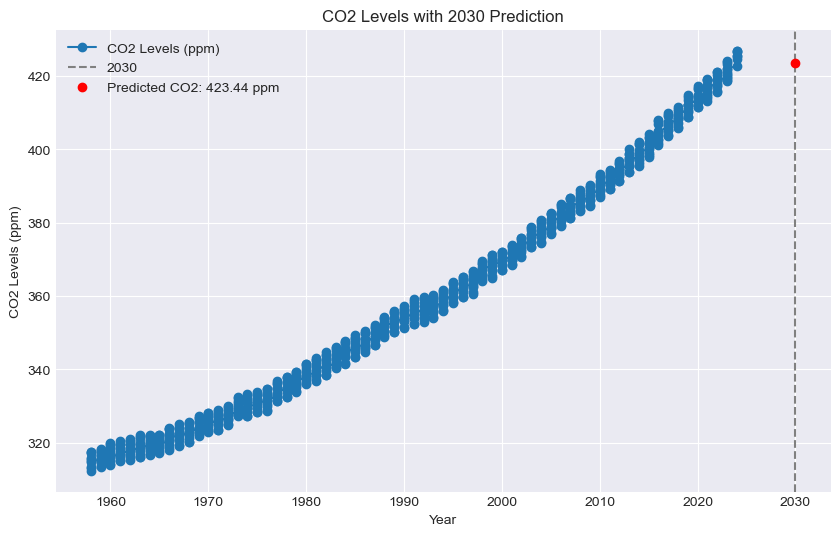

In [102]:
# CO2 Levels
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(CO2_df['year'], CO2_df['CO2'], 'o-', label='CO2 Levels (ppm)')
plt.axvline(x=2030, color='gray', linestyle='--', label='2030')
plt.scatter(2030, predicted_co2, color='red', zorder=5, label=f'Predicted CO2: {predicted_co2[0]:.2f} ppm')
plt.xlabel('Year')
plt.ylabel('CO2 Levels (ppm)')
plt.title('CO2 Levels with 2030 Prediction')
plt.legend()
plt.grid(True)
plt.show()

CO2 Levels Over Time and in the Future

Graph Interpretation:

Description: This plot displays the trend in CO2 levels (in ppm) over the years and future prediction, with the x-axis representing the years and the y-axis showing CO2 concentration levels. The plot also includes a projection for future CO2 levels.

Observations:

The plot illustrates a consistent upward trend in CO2 levels over time.
Recent decades show a notable increase in CO2 concentrations, which is likely related to industrial and economic activities.
The projection indicates that this trend is expected to continue, with future CO2 levels rising accordingly.

Results Interpretation:

The historical increase in CO2 levels aligns with global reports of rising greenhouse gas emissions.
The forecasted CO2 concentration for 2030 is approximately 423.44 ppm, continuing the observed upward trend and indicating ongoing atmospheric accumulation.

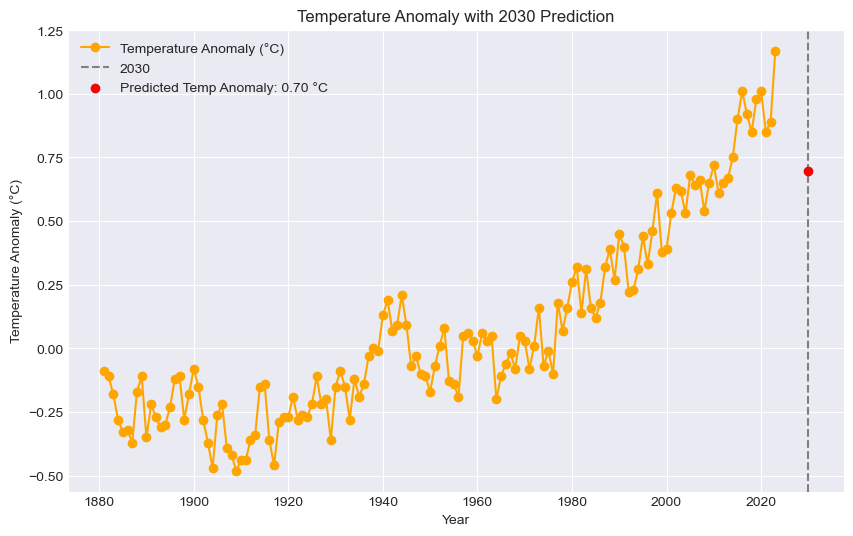

In [104]:
# Temperature Anomaly
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temperature_df['year'], temperature_df['Temperature_Anomaly'], 'o-', color='orange', label='Temperature Anomaly (°C)')
plt.axvline(x=2030, color='gray', linestyle='--', label='2030')
plt.scatter(2030, predicted_temp, color='red', zorder=5, label=f'Predicted Temp Anomaly: {predicted_temp[0]:.2f} °C')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Anomaly with 2030 Prediction')
plt.legend()
plt.grid(True)
plt.show()

Temperature Anomalies Over Time

Graph Interpretation:

Description: This plot displays temperature anomalies (in °C) over the years and future prediction. The x-axis denotes the years, while the y-axis shows temperature anomalies.

Observations:

The graph shows a clear upward trend in temperature anomalies, indicating global warming.
Despite some fluctuations, the overall trend demonstrates an increase, with recent years exhibiting higher anomalies compared to earlier periods.

Results Interpretation:

The rising trend in temperature anomalies corroborates the widespread scientific consensus on global warming.
The model predicts a temperature anomaly of approximately 0.70 °C for 2030, reflecting the ongoing warming trend observed in recent decades.

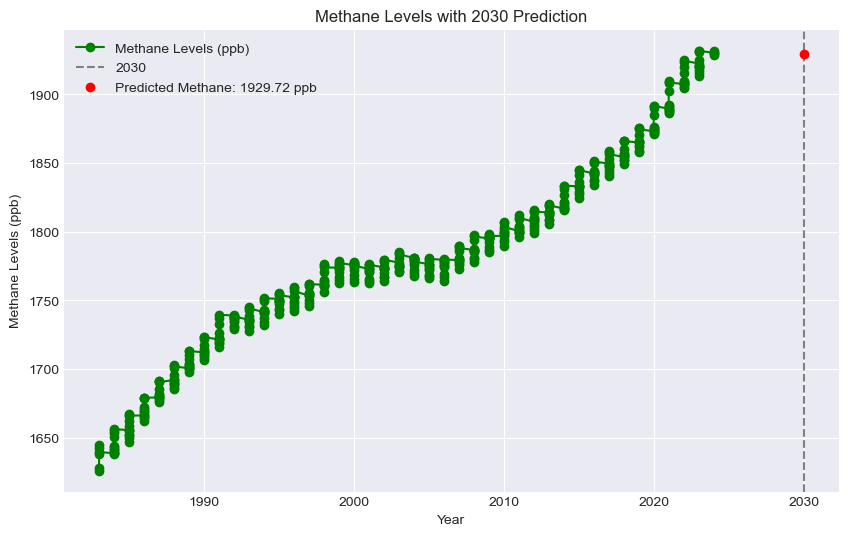

In [106]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(methane_df['year'], methane_df['Methane'], 'o-', color='green', label='Methane Levels (ppb)')
plt.axvline(x=2030, color='gray', linestyle='--', label='2030')
plt.scatter(2030, predicted_methane, color='red', zorder=5, label=f'Predicted Methane: {predicted_methane[0]:.2f} ppb')
plt.xlabel('Year')
plt.ylabel('Methane Levels (ppb)')
plt.title('Methane Levels with 2030 Prediction')
plt.legend()
plt.grid(True)
plt.show()

Methane Levels Over Time

Graph Interpretation:

Description: This plot illustrates methane levels (in ppb) over time with predictions. The x-axis represents the years, and the y-axis shows methane concentration levels.

Observations:

Methane levels exhibit a general upward trajectory, although the rate of increase varies over time.
Recent years may show a more pronounced rise, indicative of changes in methane emission sources and levels.
Results Interpretation:

The increasing trend in methane levels underscores the growing concern over methane emissions, a potent greenhouse gas.
The forecasted methane level for 2030 is approximately 1929.72 ppb, signaling an ongoing rise in methane concentrations.

## Summary of Predictions

CO2 Levels: The projected CO2 level for 2030 is 423.44 ppm, continuing the upward trend observed in historical data and indicating persistent atmospheric accumulation.

Temperature Anomalies: The predicted temperature anomaly for 2030 is 0.70 °C, consistent with the observed trend of rising global temperatures.

Methane Levels: The forecasted methane level for 2030 is 1929.72 ppb, reflecting the ongoing increase in methane concentrations.

## Conclusion

The visualizations and predictions clearly illustrate the trends in CO2 levels, temperature anomalies, and methane concentrations. These results highlight the urgent need for continued climate action and mitigation efforts to address rising greenhouse gas concentrations and their impact on global warming.

This project demonstrates a comprehensive approach to analyzing and predicting climate-related metrics. By integrating data analysis, visualization, and predictive modeling, valuable insights into future climate trends are obtained, contributing to a better understanding of environmental changes.